In [2]:
import cv2
import handtrackingmodule as htm

![hand landmarks.png](<attachment:hand landmarks.png>)
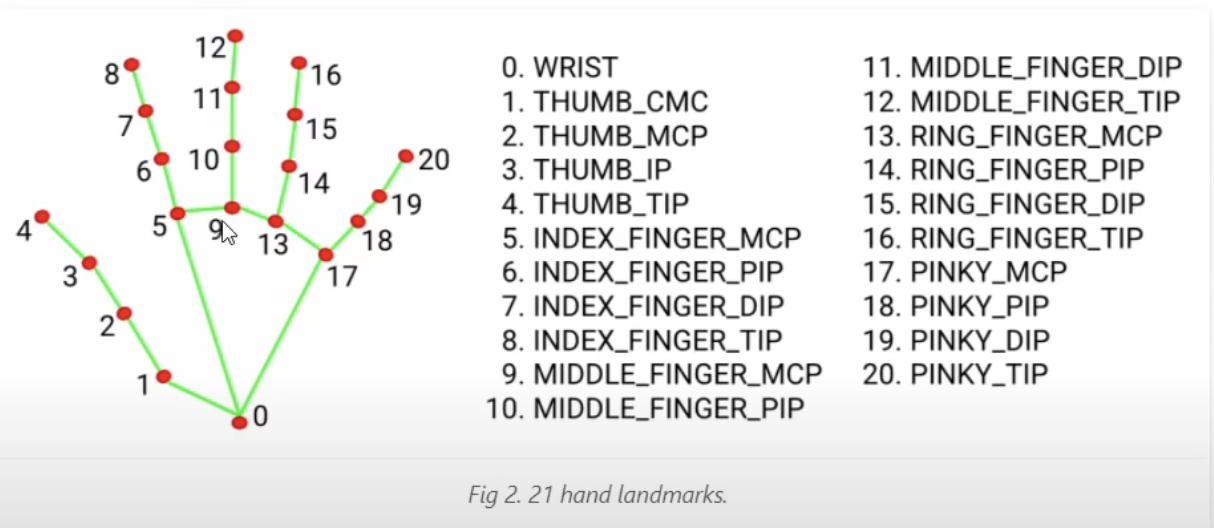

In [3]:
cap = cv2.VideoCapture(0)
cap.set(3, 1280)  # width
cap.set(4, 460)   # height

detector = htm.handDetector(detectionCon=0.7)
colorR = (0, 255, 0)

cx, cy, w, h = 100, 100, 200, 200

while True:
    success, img = cap.read()
    img = cv2.flip(img, 1)
    img = detector.findHands(img)
    lmList = detector.findPosition(img)

    if lmList:
        l = detector.distance(lmList[8], lmList[12])
        # print(l)

        if l<3000:
            cursor = lmList[12]  # Index finger tip
            # print("Cursor Position:", cursor)  # Debugging
            if cx-w//2 < cursor[1] < cx+w//2 and cy-h//2 < cursor[2] < cy+h//2:
                colorR = (255, 0, 255) 
                cx, cy = cursor[1], cursor[2]
            else:
                colorR = (0, 255, 0)

    cv2.rectangle(img, (cx-w//2, cy-h//2), (cx+w//2, cy+h//2), colorR, cv2.FILLED)

    cv2.imshow("Webcam", img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

I0000 00:00:1742712869.376102 7276673 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1742712869.388948 7277028 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1742712869.406136 7277033 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
2025-03-23 12:24:29.561 Python[84426:7276673] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.
W0000 00:00:1742712871.388168 7277033 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


-1